# **House Price Prediction Project**

In [2]:
#Load Libraries
import numpy
import pandas as pd
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from matplotlib import pyplot 
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error 

In [3]:
# Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

In [4]:
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
dataset.tail(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98,19.1
487,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666.0,20.2,388.22,11.45,20.6
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1
493,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391.0,19.2,396.90,12.01,21.8
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391.0,19.2,396.90,13.59,24.5
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60,23.1


In [6]:
dataset.shape

(506, 14)

In [7]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [10]:
# Set the precision to 2
pd.set_option('display.precision', 2)

# Print the correlation matrix
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

# Data Visualizations


## Unimodal Data Visualizations

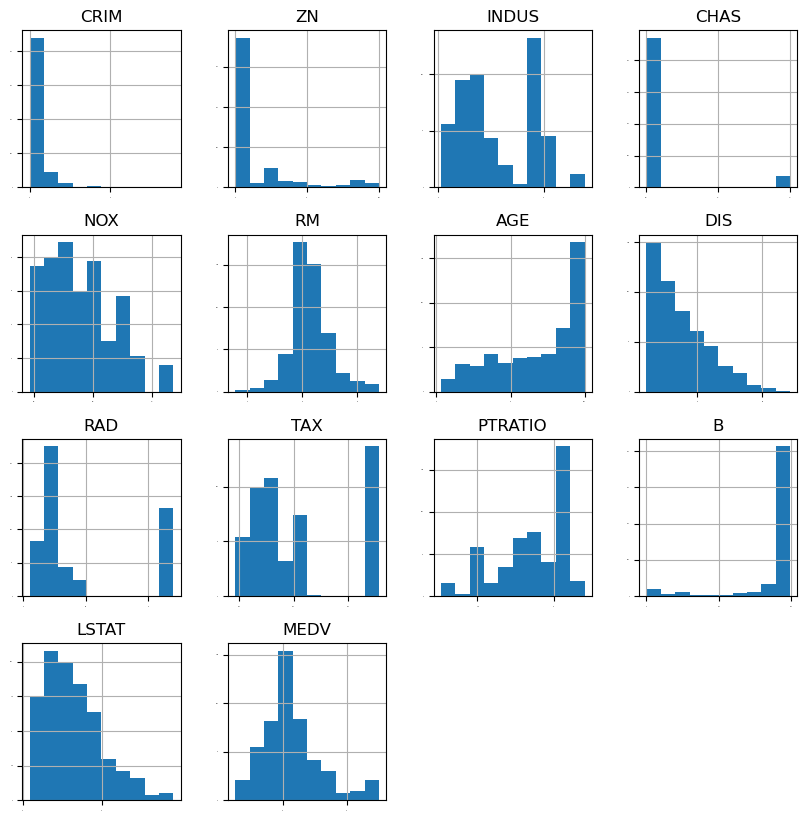

In [10]:
# Histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,10))
pyplot.show()

In [13]:
# We can see that some of the attributes have exponential distribution, such as CRIM, ZN, AGE, B.
# While, RAD and TAX have bimodal distributions. 

In [11]:
# Density plots
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axes = plt.subplots(nrows=4, ncols=4)

# Plot the density of each column
for i, column in enumerate(dataset.columns):
    sns.kdeplot(dataset[column], ax=axes[i // 4, i % 4], linewidth=2, alpha=0.8, f)

# Set the titles of the axes
for i, column in enumerate(dataset.columns):
    axes[i // 4, i % 4].set_title(column)

# Adjust the spacing between the axes
plt.tight_layout()

# Show the figure
plt.show()


SyntaxError: positional argument follows keyword argument (Temp/ipykernel_4596/2338197369.py, line 10)

In [ ]:
# We can see that NOX< RM and LSTAT have skewed Gaussian distributions

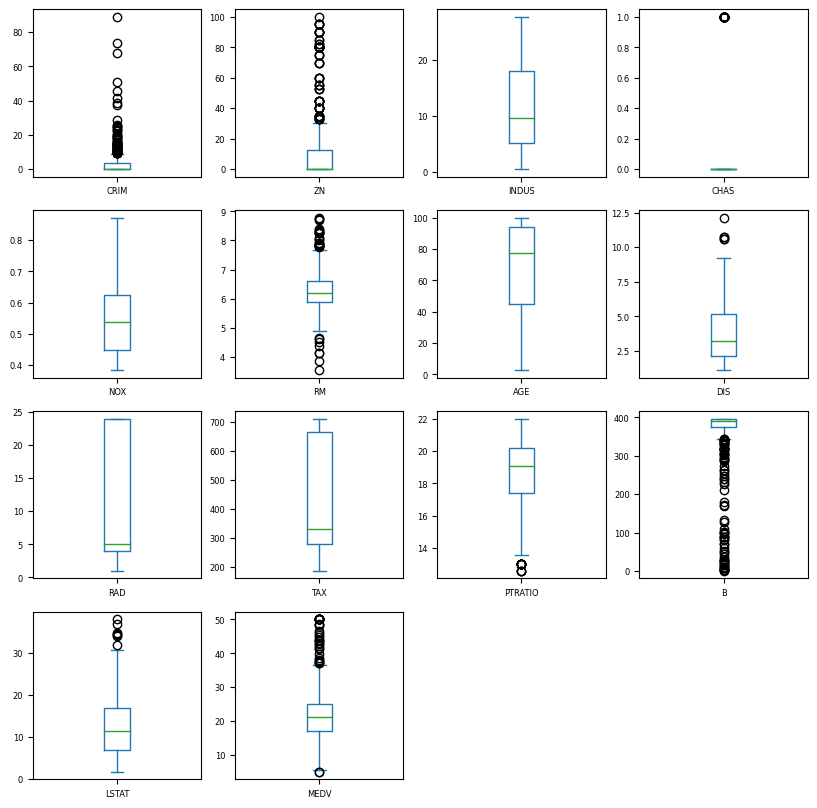

In [12]:
dataset.plot(kind='box', sharex=False, sharey=False, subplots=True, layout=(4,4), fontsize=6, figsize=(10,10));

In [ ]:
# So, there are many outliers in these box and whisker plots. So data must be transformed before we can train our model on it. 


# Multimodal Data Visualizations


<AxesSubplot:>

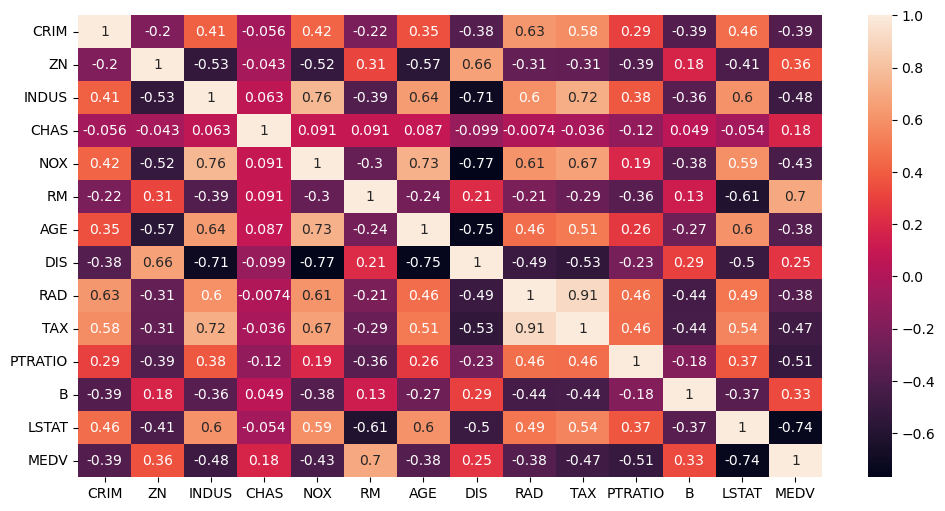

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(), annot=True)

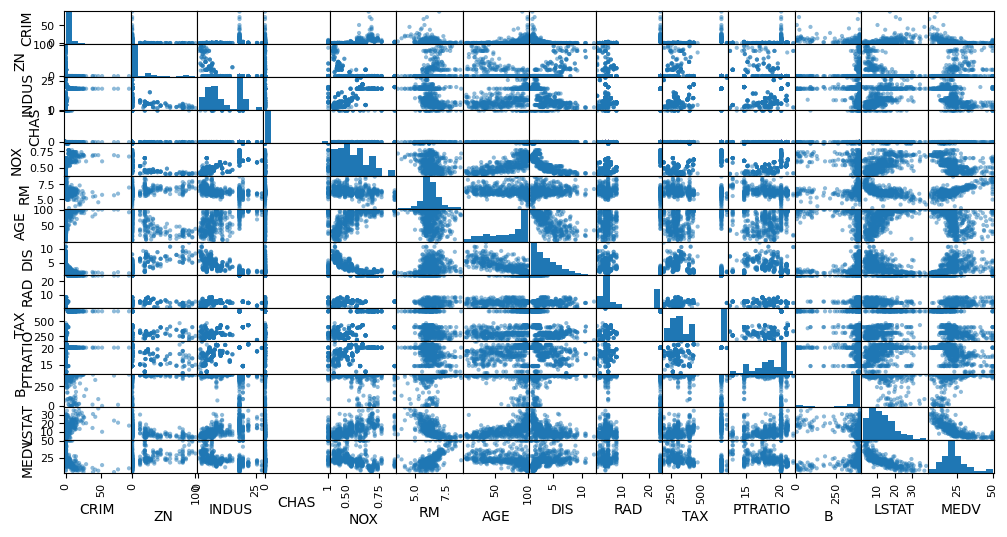

In [14]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(12,6))
pyplot.show()


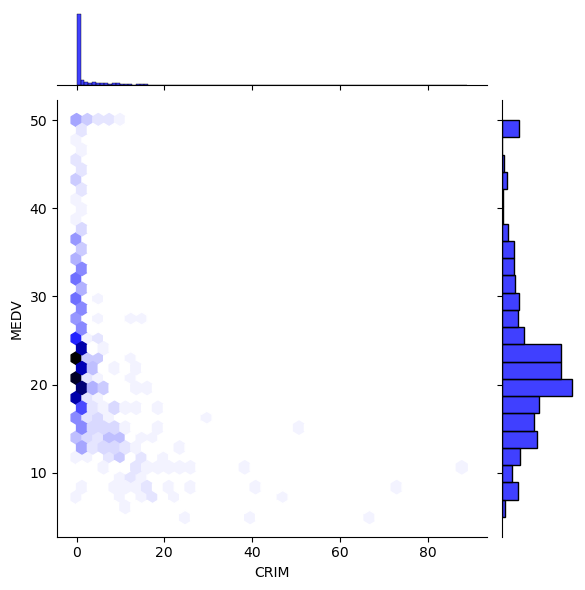

In [17]:
sns.jointplot(data=dataset, x="CRIM", y="MEDV", kind='hex', color='b')

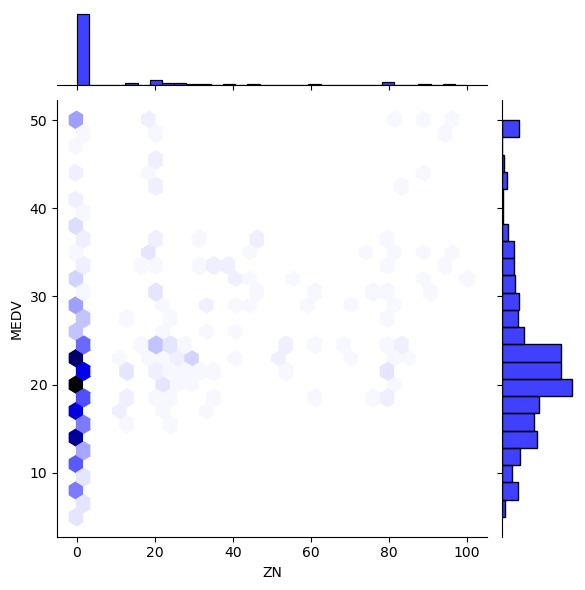

In [18]:
sns.jointplot(data=dataset, x="ZN", y="MEDV", kind='hex', color='b')

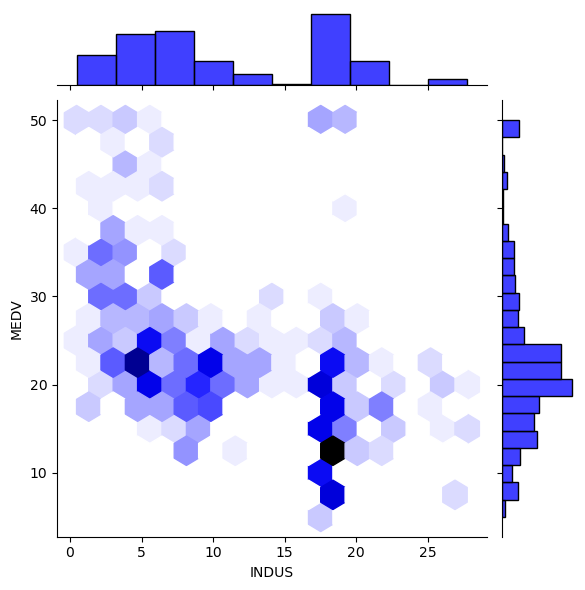

In [19]:
sns.jointplot(data=dataset, x="INDUS", y="MEDV", kind='hex', color='b')

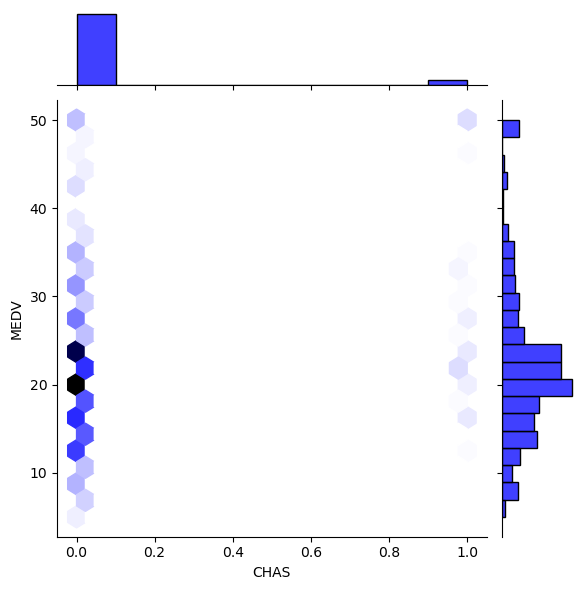

In [20]:
sns.jointplot(data=dataset, x="CHAS", y="MEDV", kind='hex', color='b')

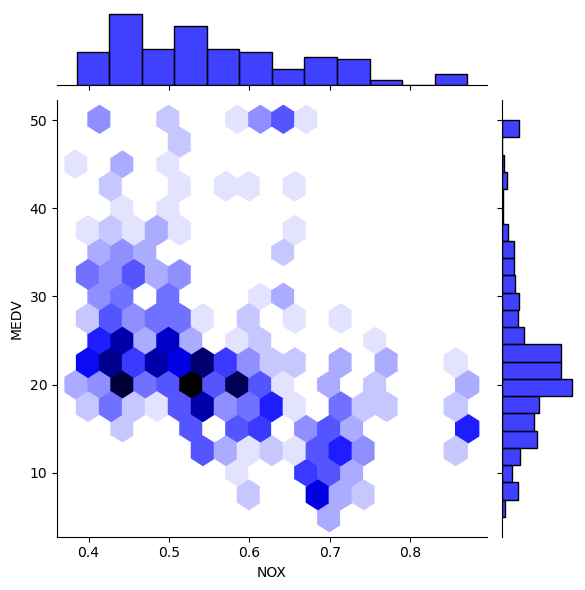

In [21]:
sns.jointplot(data=dataset, x="NOX", y="MEDV", kind='hex', color='b')

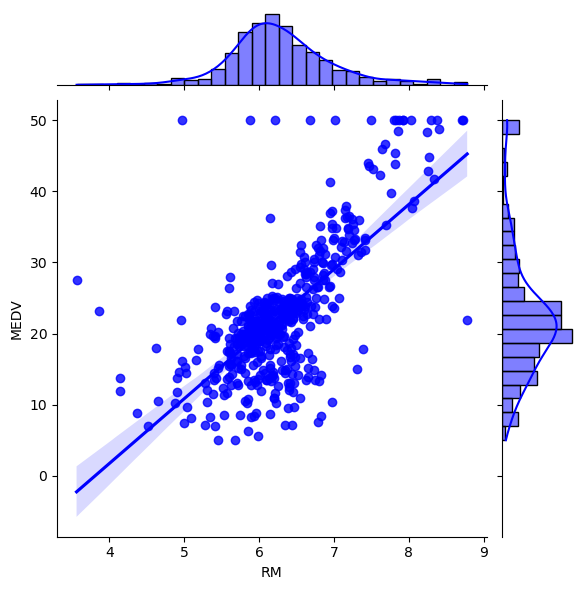

In [22]:
sns.jointplot(data=dataset, x="RM", y="MEDV", kind='reg', color='b')

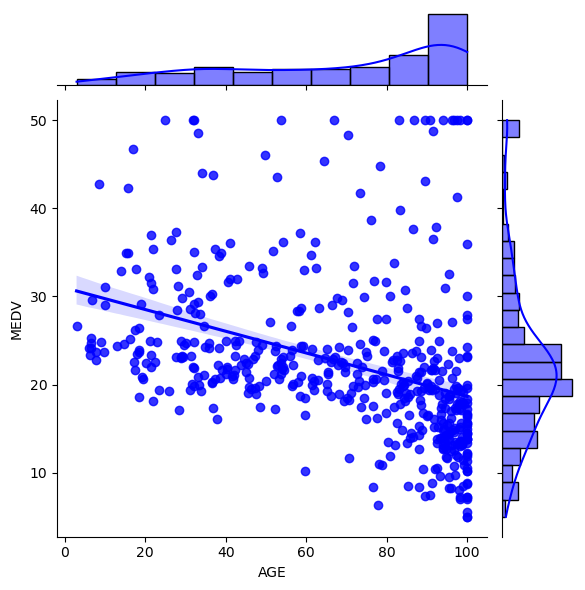

In [23]:
sns.jointplot(data=dataset, x="AGE", y="MEDV", kind='reg', color='b')

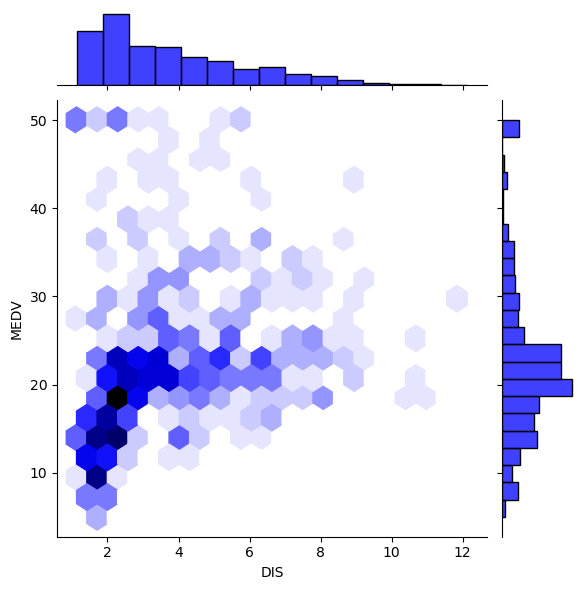

In [24]:
sns.jointplot(data=dataset, x="DIS", y="MEDV", kind='hex', color='b')

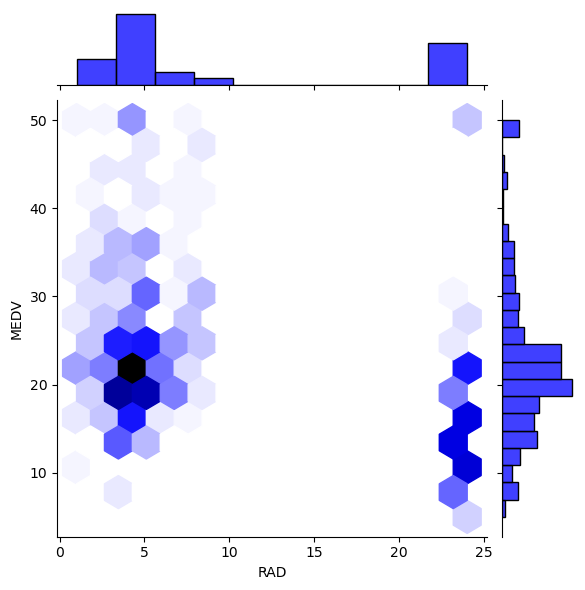

In [25]:
sns.jointplot(data=dataset, x="RAD", y="MEDV", kind='hex', color='b')

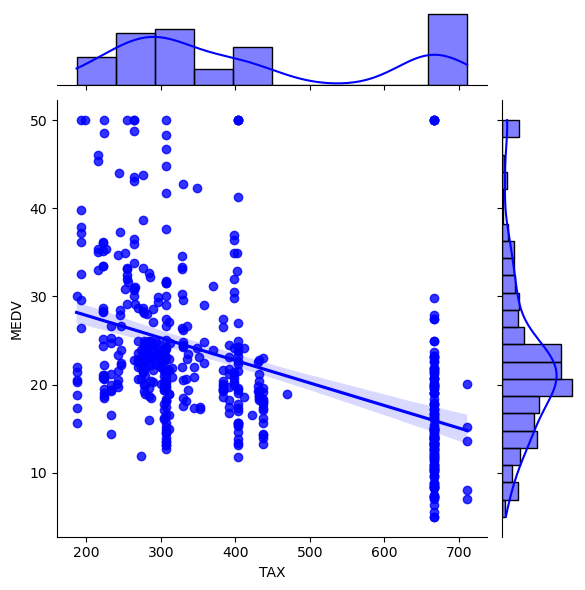

In [26]:
sns.jointplot(data=dataset, x="TAX", y="MEDV", kind='reg', color='b')

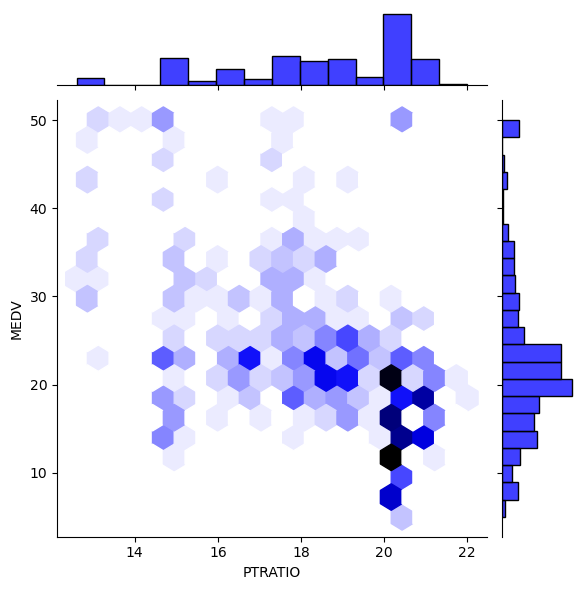

In [27]:
sns.jointplot(data=dataset, x="PTRATIO", y="MEDV", kind='hex', color='b')

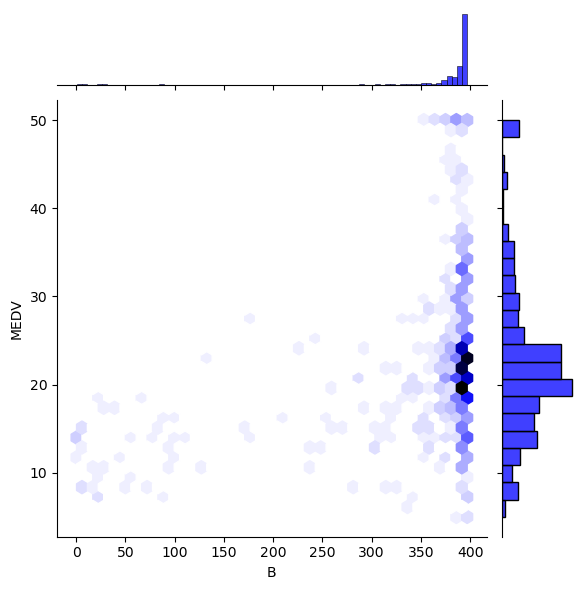

In [28]:
sns.jointplot(data=dataset, x="B", y="MEDV", kind='hex', color='b')

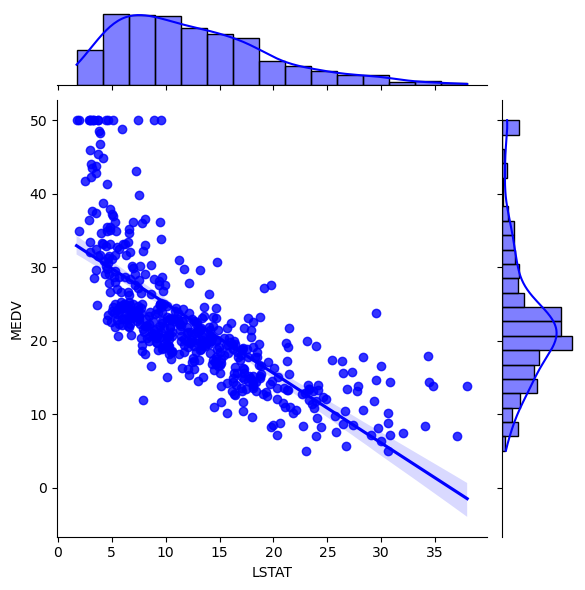

In [29]:
sns.jointplot(data=dataset, x="LSTAT", y="MEDV", kind='reg', color='b')

## Splitting the dataset into training and test data

In [11]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

## Evaluating Algorithms

In [16]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [17]:
# Checking Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [18]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -26.380590 (18.954968)
SVR: -67.824705 (32.801530)


In [34]:
# It looks like LR has the lowest MSE, followed by CART 

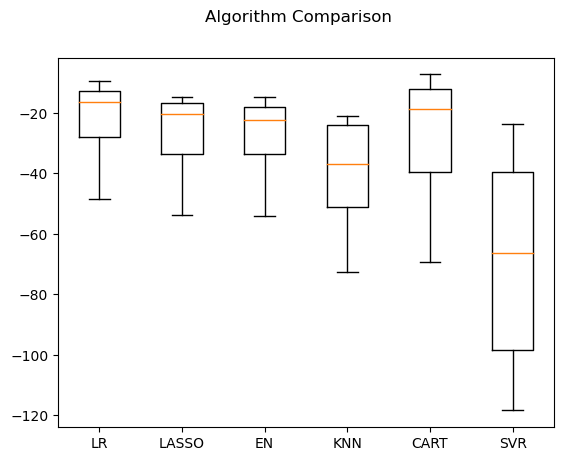

In [19]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


## Evaluating algorithms on a standardized data.

In [20]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -28.290596 (19.602763)
ScaledSVR: -29.570433 (18.052964)


In [37]:
# We see scaling did have an effect on KNN, driving the error lower than the other models.

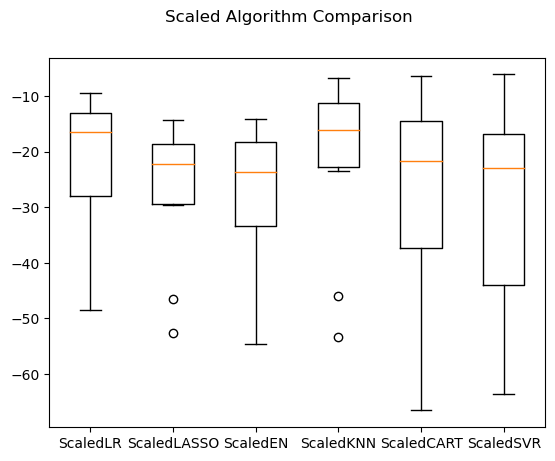

In [21]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [39]:
# We can see that KNN has both a tight distribution of error and has the lowest score

In [40]:
# Now, We are going to tune KNN

In [22]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [23]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


In [43]:
# We can see that the best for k (n neighbors) is 1 providing a mean squared error of -19.497829, the best so far.

In [44]:
# Another way that we can improve the performance of algorithms on this problem is by using ensemble methods.

In [24]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.708047 (7.244659)
ScaledGBM: -11.090510 (8.638368)
ScaledRF: -12.370480 (9.189409)
ScaledET: -9.063405 (6.317589)


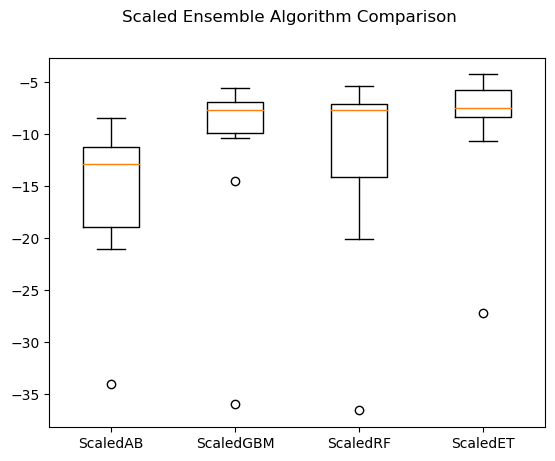

In [25]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [47]:
# We see that GBM and ET are good. To select the best out of these, we are going to evaluate these 2 ensemble methods based on different performance performance metrices.

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Create the ET model
model = GradientBoostingRegressor()

# Define the evaluation metrics you want to use
scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2', 'explained_variance': 'explained_variance'}

# Perform cross-validation and evaluate the model on each metric
results = {}
for metric_name, metric in scoring.items():
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring=metric)
    results[metric_name] = scores

# Print the results for each metric
for metric_name, scores in results.items():
    print(f"{metric_name}: {scores.mean()} ({scores.std()})")


mse: -9.995510570247646 (4.471145821972838)
r2: 0.8791886266991978 (0.040060418657975)
explained_variance: 0.8792589863850686 (0.0412610291277967)


In [32]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Create the ET model
model = ExtraTreesRegressor()

# Define the evaluation metrics you want to use
scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2', 'explained_variance': 'explained_variance'}

# Perform cross-validation and evaluate the model on each metric
results = {}
for metric_name, metric in scoring.items():
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring=metric)
    results[metric_name] = scores

# Print the results for each metric
for metric_name, scores in results.items():
    print(f"{metric_name}: {scores.mean()} ({scores.std()})")


mse: -9.236698772317066 (5.425762143648694)
r2: 0.8851079677529619 (0.04970676341575124)
explained_variance: 0.891415537402519 (0.048411795701185784)


In [33]:
# Both models showed good performance, with similar results across the metrics. We are going to use ExtratreesRegressor

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]
}

# Create the model
model = ExtraTreesRegressor()

# Create the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV
grid_result = grid.fit(X_train, Y_train)

# Print the best score and parameters
print("Best score:", grid_result.best_score_)
print("Best parameters:", grid_result.best_params_)

# Get the mean test scores for each fold
means = grid_result.cv_results_['mean_test_score']

# Get the standard deviations of the test scores for each fold
stds = grid_result.cv_results_['std_test_score']

# Get the parameters for each fold
params = grid_result.cv_results_['params']

# Print the mean test scores, standard deviations, and parameters for each fold
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best score: -9.199875974142115
Best parameters: {'n_estimators': 350}
-9.963836 (5.027796) with: {'n_estimators': 50}
-9.526194 (4.582364) with: {'n_estimators': 100}
-9.470654 (4.725747) with: {'n_estimators': 150}
-9.275723 (4.636225) with: {'n_estimators': 200}
-9.578848 (4.734824) with: {'n_estimators': 250}
-9.320821 (4.533457) with: {'n_estimators': 300}
-9.199876 (4.683877) with: {'n_estimators': 350}
-9.358340 (4.760248) with: {'n_estimators': 400}


In [54]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=350)
model.fit(rescaledX, Y_train)

ExtraTreesRegressor(n_estimators=350, random_state=7)

In [55]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


13.69358993597443


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the model
model = GradientBoostingRegressor()

# Create the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV
grid_result = grid.fit(X_train, Y_train)

# Print the best score and parameters
print("Best score:", grid_result.best_score_)
print("Best parameters:", grid_result.best_params_)

# Get the mean test scores for each fold
means = grid_result.cv_results_['mean_test_score']

# Get the standard deviations of the test scores for each fold
stds = grid_result.cv_results_['std_test_score']

# Get the parameters for each fold
params = grid_result.cv_results_['params']

# Print the mean test scores, standard deviations, and parameters for each fold
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best score: -10.251011072394698
Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
-19.554643 (5.924273) with: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
-19.110777 (5.780162) with: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
-19.485293 (5.933520) with: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
-19.512011 (5.922911) with: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
-19.701139 (6.110413) with: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
-19.561587 (5.975750) with: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
-19.811696 (6.202272) with: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 350}
-19.268133 (5.726482) with: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 400}
-16.065878 (6.380296) with: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
-15.955272 (6.571982) with: {'max_depth': None, 'min_

In [23]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [24]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


11.902132586880027


In [ ]:
# GradientBoostingRegressor model is performing better than the ExtraTreesRegressor model in terms of minimizing the MSE.

In [25]:
import pickle

# Save the trained model to a file
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(model, f)

